## Import some libraries

In [53]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


## Utility function to read images

In [54]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## See original frame

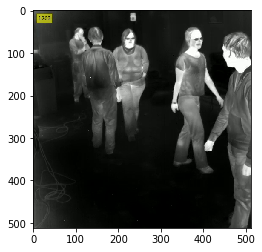

In [55]:
image = read_image(os.path.join("data", "original.png"))
plt.imshow(image)

## See the original image in HOT colormap

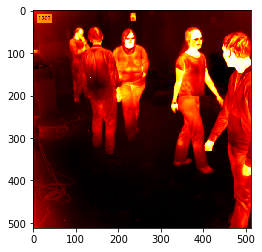

In [63]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
plt.imshow(heatmap)
plt.imsave(os.path.join("output", "2_hot_colormap.png"), heatmap, cmap='gray')

## Do binary threshold

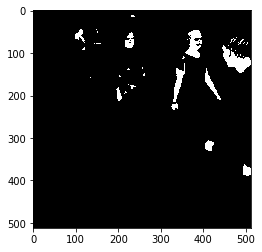

In [64]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')
plt.imsave(os.path.join("output", "3_binary_thresh.png"), binary_thresh, cmap='gray')

## Opening operation. i.e. Erosion followed by Dilation

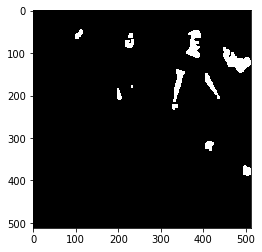

In [65]:
kernel = np.ones((5, 5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)
plt.imshow(image_opening, cmap='gray')
plt.imsave(os.path.join("output", "4_opening.png"), image_opening, cmap='gray')

## Find contours and draw rectangles

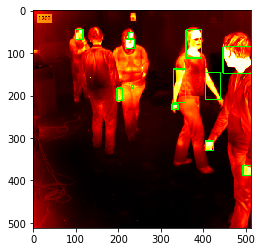

In [60]:
# Get contours from the image obtained by opening operation
contours, _ = cv2.findContours(image_opening, 1, 2)

image_with_rectangles = np.copy(heatmap)

for contour in contours:
    # rectangle over each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw rectangles for visualisation
    image_with_rectangles = cv2.rectangle(
        image_with_rectangles, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image_with_rectangles)
plt.imsave(os.path.join("output", "5_hot_colormap.png"), image_with_rectangles)

## Save images for blog

In [51]:
original_image = read_image(os.path.join("data", "original-1449.png"))
output_image = read_image(os.path.join("output", "output-1449.png"))

(512, 512, 3)


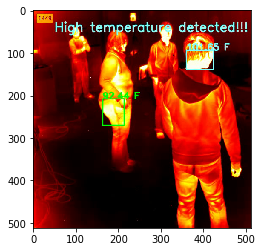

In [46]:
print(output_image.shape)
plt.imshow(output_image)

(512, 512, 3)


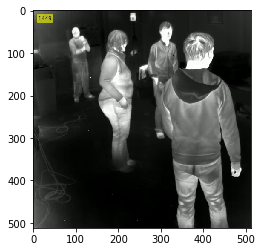

In [47]:
print(original_image.shape)
plt.imshow(original_image)

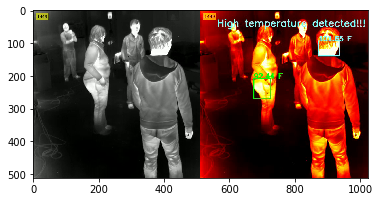

In [48]:
stacked = np.hstack((original_image, output_image))
plt.imshow(stacked)
plt.imsave(os.path.join("output", "thermal-screening-codevector-labs.png"), stacked)